In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.applications.xception import Xception
from keras.models import load_model
from pickle import load
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
MODEL_PATH = 'model\\models\\model100.h5'
TOKENIZER = 'data\\output\\tokenizer.p'

In [21]:
def extract_features(filename, model):
        try:
            image = Image.open(filename)            
        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
        image = image.resize((299,299))
        image = np.array(image)
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/255
        feature = model.predict(image)
        return feature

In [22]:
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [23]:
def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text

In [24]:
def caption_generator(img_path):
    max_length = 31
    #add correct path
    tokenizer = load(open(TOKENIZER,"rb"))
    model = load_model(MODEL_PATH)
    xception_model = Xception(include_top=False, pooling="avg")

    photo = extract_features(img_path, xception_model)

    img = Image.open(img_path)

    description = generate_desc(model, tokenizer, photo, max_length)
    return description[6:-3]

aeroplane ready for the takeoff 


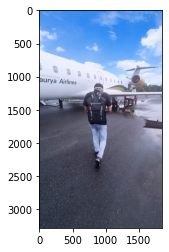

In [25]:

if __name__ =="__main__":
    img_path = 'data\\Images\\Bibek2.jpg'
    img = Image.open(img_path)
    caption = caption_generator(img_path)
    plt.imshow(img)
    print(caption)